In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11

from functools import partial, reduce
from itertools import product

import seaborn as sns


from analyze_data import result, get_summary

from create_figures import add_p_bars, boxplot, add_multilevel_xticks, lineplot

from matplotlib.ticker import AutoMinorLocator

folder = '/media/raphael/PortableSSD/diploma_thesis/Data/'

def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    if ax.get_legend() != None:
        ax.get_legend().set_title("")
        ax.get_legend().set(alpha = 0, frame_on=False)
    return ax


In [2]:
c = result().read(rf"{folder}/Y. Quenching/Curve.csv")
c.summarize(values = "Mean", groups = ["Group"]).head(100)

,mean,sd,ci_lo,ci_hi,count
Group,,,,,
20.0,43.560533,0.401176,43.0518,44.032400,3
18.0,38.877467,1.674275,36.5334,40.339000,3
15.0,33.491600,0.498037,32.8174,34.005200,3
12.0,28.077800,0.243145,27.7442,28.316800,3
11.0,25.752667,0.235777,25.5546,26.084000,3
10.0,26.089467,0.659863,25.4792,27.006000,3
8.0,21.375867,0.749239,20.5290,22.350800,3
7.0,19.120667,0.540006,18.4128,19.722800,3
6.0,16.291467,0.484615,15.6120,16.657067,3


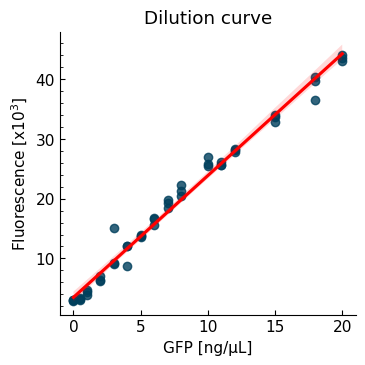

In [3]:
fig1,ax = plt.subplots(figsize = (3.54,3.54), layout = "constrained")
ax = sns.regplot(data = c.df,
                 x = "Group",
                 y = "Mean",
                 ci=99,
                 color = "#003f5c",
                 line_kws = {"color": "r"},
                 ax=ax)
ax = prettify(ax,
              title = "Dilution curve",
              x = ("GFP","ng/µL"),
              y = ("Fluorescence","x$10^3$"))
fig1.savefig("../../plots/Fig6_Reg.svg", format = "svg")

In [4]:
r = result().read(f"{folder}/Y. Quenching/Results.csv")
r.summarize(values = "Mean", groups = ["Group"]).round(2).head(100)

,mean,sd,ci_lo,ci_hi,count
Group,,,,,
X,27.74,6.60,23.12,31.96,9
TP,30.84,7.66,26.42,35.88,9
FY,29.30,6.28,25.45,33.31,9


In [5]:
r.create_p_table().round(2)

,Group,p,star
Group,,,
X,TP,0.80,ns
X,FY,0.68,ns


/tmp/ipykernel_15947/3571438916.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


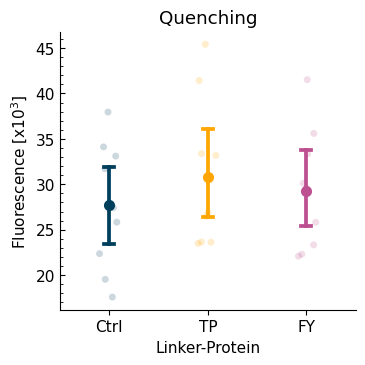

In [6]:

def prettify_pointplot(ax):
    ax.tick_params(bottom = True)
    return ax

def pointplot(data, 
                x=None, 
                y=None ,
                hue = None,
                ax=None, 
                y_scale = 1,
                rm_outliers = False,
                thin = 1,
                jitter = 0.2,
                d_bool = False,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                **kwargs):
    if x == hue:
        d_bool = False
        dodge = False
    sns.stripplot(
    data=data, x=x, y=y, hue=hue,
    dodge=d_bool, alpha=.2, legend=False,
    palette=palette,
    ax=ax
    )
    sns.pointplot(
        data=data, x=x, y=y, hue=hue,
        dodge=dodge, errorbar="ci",
        marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.1,
        ax=ax,
        palette=palette
    )
    
    return ax

fig2,ax = plt.subplots(figsize = (3.54,3.54), layout = "constrained")
ax = pointplot(data = r.df,
                 x = "Group",
                 y = "Mean",
                 hue = "Group",
                 y_scale = 1,
                 jitter = 0.4,
                 ax=ax)
ax = prettify(ax,
              title = "Quenching",
              x = ("Linker-Protein",""),
              y = ("Fluorescence","x$10^3$"))
ax = prettify_pointplot(ax)
ax.tick_params(axis = "x",which = "both", 
                   direction = "out")
ax.set_xticklabels(["Ctrl","TP","FY"])
# ax.set_ylim(0,1.4)
fig2.savefig("../../plots/Fig6_qunching.svg", format = "svg")